In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def funcao_ativacao(potencial_ativacao_u):
    return potencial_ativacao_u >= 0

In [3]:
def funcao_logistica(potencial_ativacao_u):
    return 1/(1 + np.exp(-potencial_ativacao_u))

In [4]:
def calcular_erro_medio(pesos_w, desejados_d, np_entradas, debug = False):
    potencial_ativacao_u = np.dot(np_entradas, pesos_w)
    erros = desejados_d - funcao_logistica(potencial_ativacao_u)
    if debug:
        print("erros: " + str(erros))
    erros_quadraticos = np.square(erros)
    if debug:
        print("erros quadráticos: " + str(erros_quadraticos))
    erro_medio = np.average(erros_quadraticos)
    if debug:
        print("erro médio: " + str(erro_medio))
    return erro_medio

In [5]:
def plotar_fronteira(pesos, entradas, desejados):
    plt.style.use('ggplot')

    b, w1, w2 = pesos
    print("pesos:")
    print(b, w1, w2)
    x = -b / w1
    y = -b / w2
    d = y
    c = -y / x

    line_x_coords = np.array([0, x])
    print("coordenadas x:")
    print(line_x_coords)
    line_y_coords = c * line_x_coords + d
    print("coordenadas y:")
    print(line_y_coords)

    plt.plot(line_x_coords, line_y_coords)
    plt.scatter(entradas[:, 0], entradas[:, 1], c=desejados, s=75)
    plt.show()

In [6]:
def adaline(iteracoes_maxima, erros, taxa_aprendizagem, entradas_x, pesos_w, desejados_d, precisao, plot = True, debug = False):
    ##Adiciona um coeficiente 1 para o bias na matriz de entradas
    np_entradas = np.c_[np.ones(entradas_x.shape[0]), entradas_x]
    epoca = 1
    erro_anterior = 0
    erro_medio = 0
    erroEsperado = False
    while (epoca < iteracoes_maxima and not erroEsperado):
        if debug:
            print("entradas: " + str(np_entradas))
        if debug:
            print("desejados: " + str(desejados_d))
        if debug:
            print("pesos: " + str(pesos_w))
        potencial_ativacao_u = np.dot(np_entradas, pesos_w)
        if debug:
            print("potencial de ativação u: " + str(potencial_ativacao_u))
        erro_e = desejados_d - funcao_logistica(potencial_ativacao_u)
        if debug:
            print("erro: " + str(erro_e))
        mudanca_pesos = taxa_aprendizagem * np.dot(erro_e, np_entradas)
        if debug:
            print("mudança: " + str(mudanca_pesos))
        pesos_w += mudanca_pesos
        if debug:
            print("novos pesos: " + str(pesos_w))
        erro_anterior = erro_medio
        erro_medio = calcular_erro_medio(pesos_w, desejados_d, np_entradas, debug=debug)
        variacao_erro = abs(erro_medio - erro_anterior)
        if debug:
            print("variação do erro: " + str(variacao_erro))
        erroEsperado = variacao_erro <= precisao
        if plot:
            if ((epoca == 1 or epoca % 50 == 0) or (erroEsperado)):
            #if ((epoca < 50) or (erroEsperado)):                
                print("época " + str(epoca))
                plotar_fronteira(pesos_w, entradas_x, desejados_d)
        if (not erroEsperado):
            epoca += 1
            if debug:
                print("tem erros, avançando para época " + str(epoca))
    return pesos_w, epoca, erros

época 1
pesos:
-0.711964118031 0.438307595088 0.432153804864
coordenadas x:
[ 0.          1.62434812]
coordenadas y:
[ 1.64747854  0.        ]


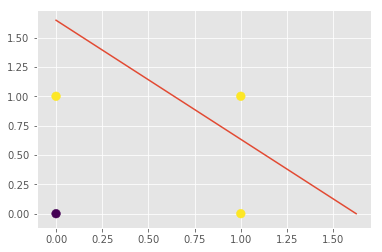

época 50
pesos:
-0.277131886853 2.00179588263 1.99911273761
coordenadas x:
[ 0.          0.13844163]
coordenadas y:
[ 0.13862744  0.        ]


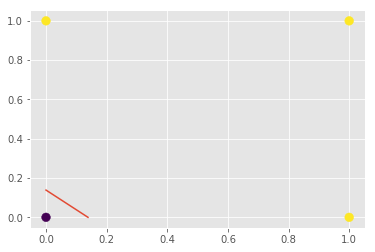

época 100
pesos:
-0.737794070171 2.74387873579 2.7423807563
coordenadas x:
[ 0.          0.26888727]
coordenadas y:
[ 0.26903415  0.        ]


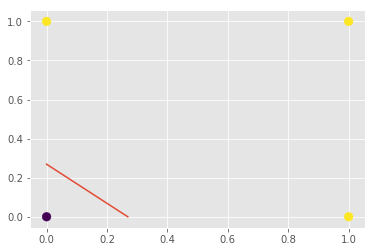

época 150
pesos:
-1.07287553074 3.3092089448 3.30828269493
coordenadas x:
[ 0.          0.32420906]
coordenadas y:
[ 0.32429983  0.        ]


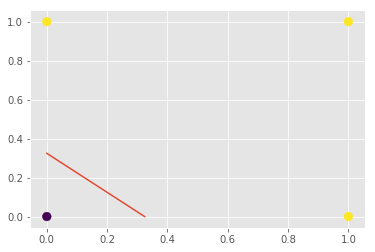

época 200
pesos:
-1.33041366067 3.76496550993 3.76434721033
coordenadas x:
[ 0.          0.35336676]
coordenadas y:
[ 0.3534248  0.       ]


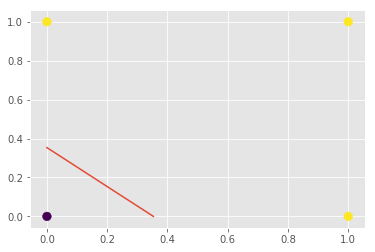

época 250
pesos:
-1.53916371347 4.1452412271 4.14480375451
coordenadas x:
[ 0.         0.3713086]
coordenadas y:
[ 0.37134779  0.        ]


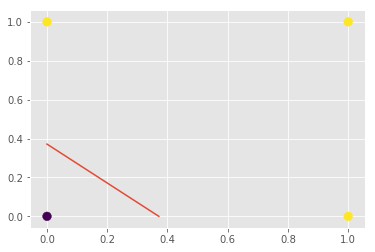

época 300
pesos:
-1.71449833039 4.47059743089 4.47027368646
coordenadas x:
[ 0.          0.38350542]
coordenadas y:
[  3.83533191e-01  -5.55111512e-17]


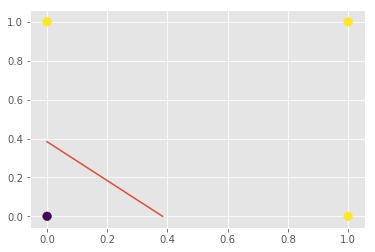

época 350
pesos:
-1.86550317831 4.75435972874 4.75411153403
coordenadas x:
[ 0.          0.39237737]
coordenadas y:
[ 0.39239786  0.        ]


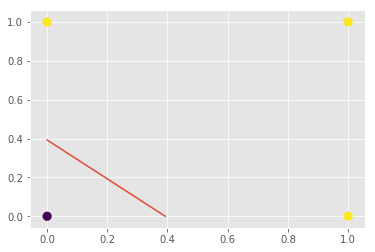

época 400
pesos:
-1.99800264289 5.0056200318 5.00542428761
coordenadas x:
[ 0.          0.39915188]
coordenadas y:
[ 0.39916749  0.        ]


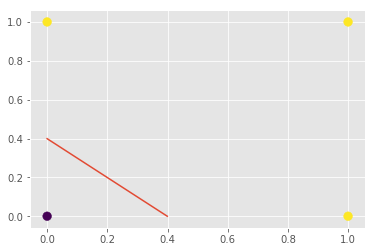

época 450
pesos:
-2.1159592916 5.23083720509 5.23067921203
coordenadas x:
[ 0.          0.40451637]
coordenadas y:
[ 0.40452859  0.        ]


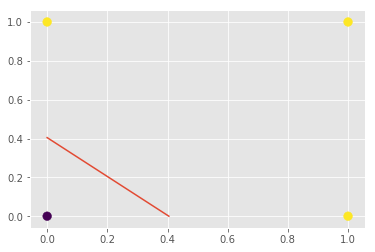

época 500
pesos:
-2.22219247323 5.43475235078 5.43462235432
coordenadas x:
[ 0.          0.40888569]
coordenadas y:
[ 0.40889547  0.        ]


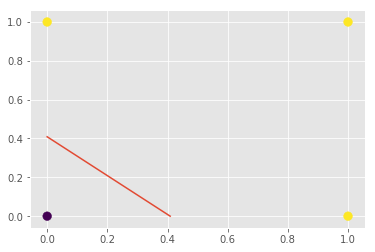

época 550
pesos:
-2.31877951329 5.62094135822 5.62083265331
coordenadas x:
[ 0.          0.41252512]
coordenadas y:
[ 0.4125331  0.       ]


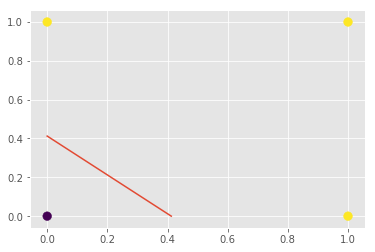

época 600
pesos:
-2.40729471099 5.79216359488 5.7920714327
coordenadas x:
[ 0.          0.41561235]
coordenadas y:
[  4.15618961e-01  -5.55111512e-17]


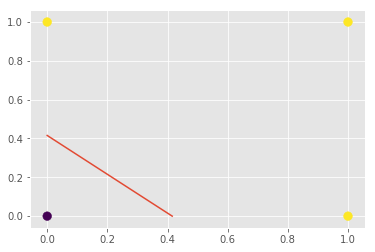

época 650
pesos:
-2.48895918745 5.95059027018 5.95051119995
coordenadas x:
[ 0.          0.41827097]
coordenadas y:
[  4.18276532e-01   5.55111512e-17]


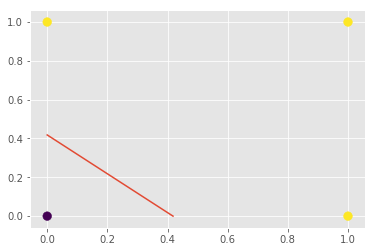

época 700
pesos:
-2.56473880787 6.09795879378 6.09789025157
coordenadas x:
[ 0.          0.42058972]
coordenadas y:
[ 0.42059445  0.        ]


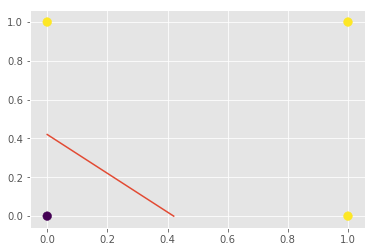

época 750
pesos:
-2.63541039873 6.23567999073 6.23562003412
coordenadas x:
[ 0.        0.422634]
coordenadas y:
[  4.22638067e-01  -5.55111512e-17]


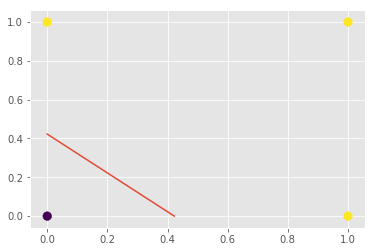

época 800
pesos:
-2.70160783552 6.36491435931 6.36486149135
coordenadas x:
[ 0.          0.42445313]
coordenadas y:
[  4.24456658e-01  -5.55111512e-17]


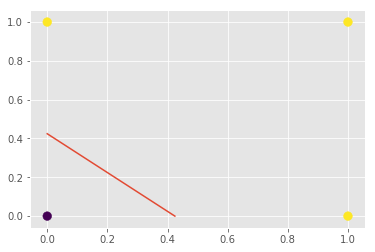

época 850
pesos:
-2.76385492214 6.4866274533 6.48658050267
coordenadas x:
[ 0.          0.42608504]
coordenadas y:
[ 0.42608812  0.        ]


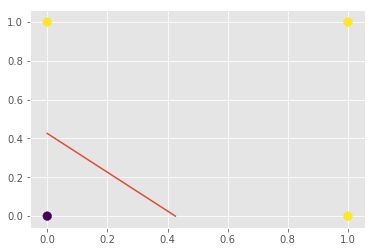

época 900
pesos:
-2.82258935512 6.60163085351 6.60158889119
coordenadas x:
[ 0.         0.4275594]
coordenadas y:
[ 0.42756212  0.        ]


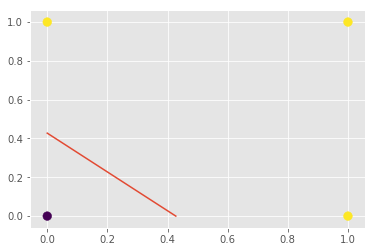

época 950
pesos:
-2.87818052096 6.71061298248 6.71057526259
coordenadas x:
[ 0.          0.42889979]
coordenadas y:
[ 0.4289022  0.       ]


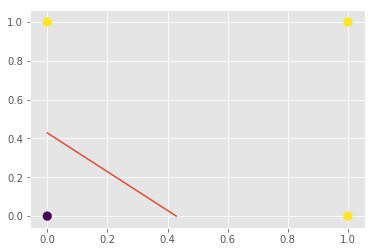

época 1000
pesos:
-2.93094293513 6.81416262571 6.81412854282
coordenadas x:
[ 0.          0.43012518]
coordenadas y:
[ 0.43012733  0.        ]


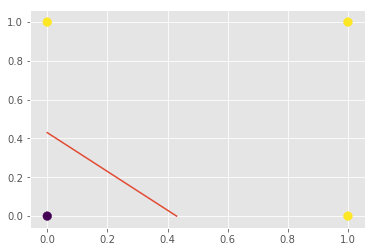

época 1050
pesos:
-2.9811465415 6.91278712731 6.91275618505
coordenadas x:
[ 0.          0.43125103]
coordenadas y:
[ 0.43125296  0.        ]


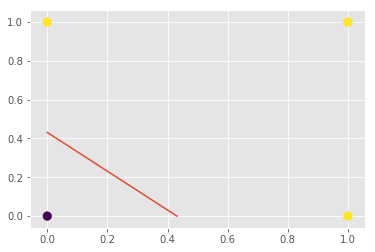

época 1100
pesos:
-3.02902471137 7.00692663745 7.00689842518
coordenadas x:
[ 0.          0.43229006]
coordenadas y:
[  4.32291797e-01  -5.55111512e-17]


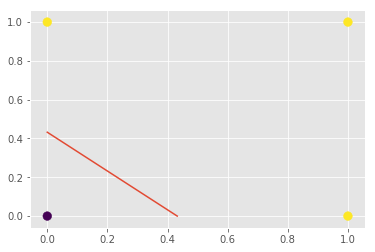

época 1150
pesos:
-3.0747805311 7.09696539225 7.09693956739
coordenadas x:
[ 0.          0.43325286]
coordenadas y:
[ 0.43325443  0.        ]


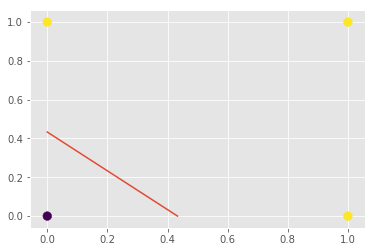

época 1188
pesos:
-3.10824574225 7.16286134723 7.16283714173
coordenadas x:
[ 0.          0.43393912]
coordenadas y:
[ 0.43394059  0.        ]


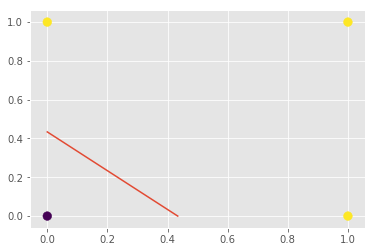

final:
1188 épocas

pesos:
-3.10824574225 7.16286134723 7.16283714173
coordenadas x:
[ 0.          0.43393912]
coordenadas y:
[ 0.43394059  0.        ]


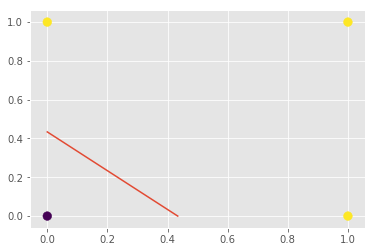

In [7]:
##Trata bias como um peso w0
pesos_w = np.array([-.8649, .3192, .3129])
np_desejados = np.array([0, 1, 1, 1])
entradas = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
pesos, epocas, erros = adaline(iteracoes_maxima=3000, erros=[], taxa_aprendizagem=0.1, entradas_x=entradas, pesos_w=pesos_w, desejados_d=np_desejados, precisao = 1e-6, plot = True, debug = False)
print("final:\n%s épocas" % (str(epocas)))
print("")
plotar_fronteira(pesos, entradas, np_desejados)

In [8]:
##Testa função de ativação com pesos finais
np_entradas = np.c_[ np.ones(entradas.shape[0]), entradas ]
funcao_ativacao(np.dot(np_entradas, pesos))

array([False,  True,  True,  True], dtype=bool)

época 1
pesos:
0.1 0.1 0.1
coordenadas x:
[ 0. -1.]
coordenadas y:
[-1.  0.]


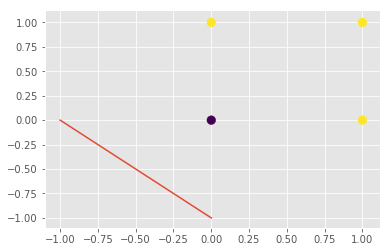

época 50
pesos:
-0.0266619557417 1.68064098561 1.68064098561
coordenadas x:
[ 0.          0.01586416]
coordenadas y:
[ 0.01586416  0.        ]


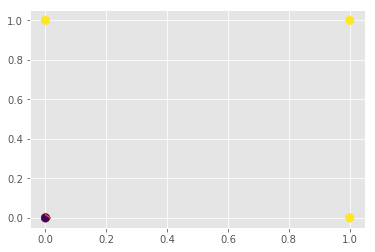

época 100
pesos:
-0.586856587236 2.50474462142 2.50474462142
coordenadas x:
[ 0.          0.23429797]
coordenadas y:
[ 0.23429797  0.        ]


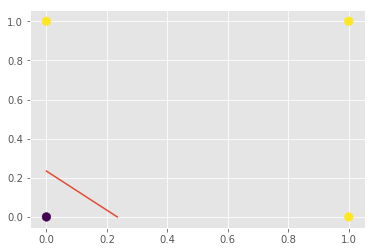

época 150
pesos:
-0.963992592075 3.12180245407 3.12180245407
coordenadas x:
[ 0.          0.30879359]
coordenadas y:
[ 0.30879359  0.        ]


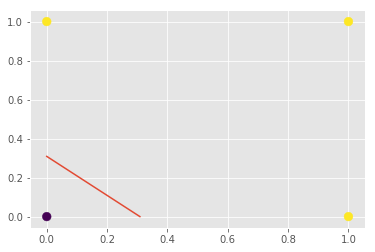

época 200
pesos:
-1.24509457934 3.61188350082 3.61188350082
coordenadas x:
[ 0.          0.34472169]
coordenadas y:
[ 0.34472169  0.        ]


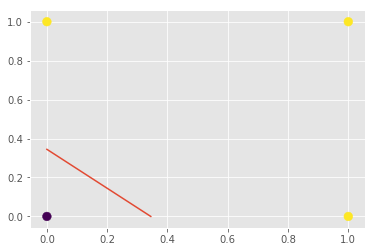

época 250
pesos:
-1.46905121825 4.01634427604 4.01634427604
coordenadas x:
[ 0.          0.36576825]
coordenadas y:
[ 0.36576825  0.        ]


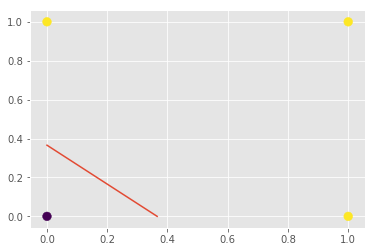

época 300
pesos:
-1.65504582681 4.35956134485 4.35956134485
coordenadas x:
[ 0.          0.37963586]
coordenadas y:
[ 0.37963586  0.        ]


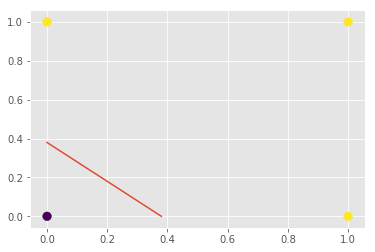

época 350
pesos:
-1.81394371979 4.65700371359 4.65700371359
coordenadas x:
[ 0.          0.38950876]
coordenadas y:
[ 0.38950876  0.        ]


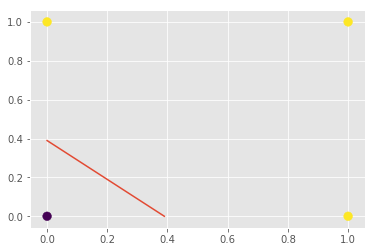

época 400
pesos:
-1.95252148409 4.91904913753 4.91904913753
coordenadas x:
[ 0.          0.39693067]
coordenadas y:
[ 0.39693067  0.        ]


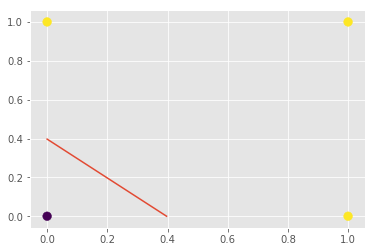

época 450
pesos:
-2.07530041047 5.1529706377 5.1529706377
coordenadas x:
[ 0.          0.40273864]
coordenadas y:
[ 0.40273864  0.        ]


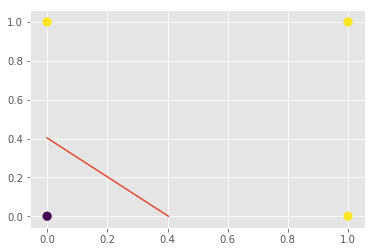

época 500
pesos:
-2.1854503216 5.36404802338 5.36404802338
coordenadas x:
[ 0.          0.40742557]
coordenadas y:
[ 0.40742557  0.        ]


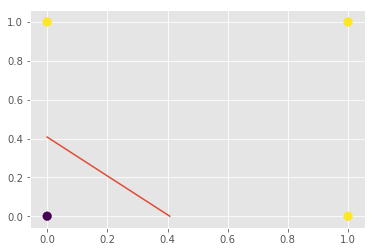

época 550
pesos:
-2.2852798349 5.55622686384 5.55622686384
coordenadas x:
[ 0.          0.41130067]
coordenadas y:
[ 0.41130067  0.        ]


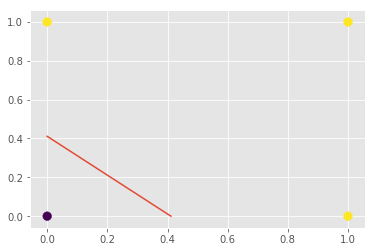

época 600
pesos:
-2.37652213448 5.73252810475 5.73252810475
coordenadas x:
[ 0.         0.4145679]
coordenadas y:
[ 0.4145679  0.       ]


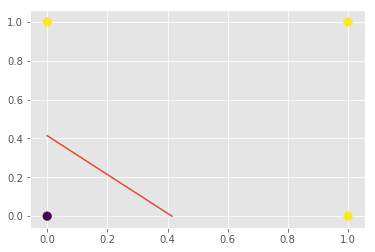

época 650
pesos:
-2.4605111066 5.89531293727 5.89531293727
coordenadas x:
[ 0.          0.41736734]
coordenadas y:
[ 0.41736734  0.        ]


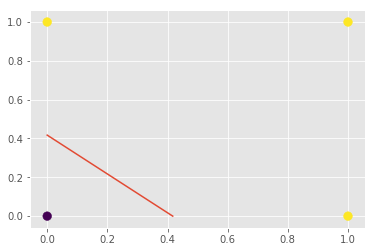

época 700
pesos:
-2.53829485235 6.04645989297 6.04645989297
coordenadas x:
[ 0.          0.41979851]
coordenadas y:
[ 0.41979851  0.        ]


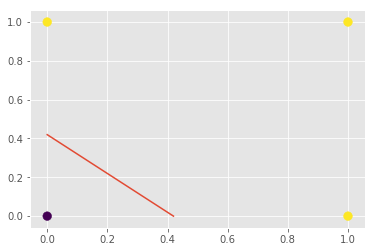

época 750
pesos:
-2.61071156638 6.18748669945 6.18748669945
coordenadas x:
[ 0.          0.42193409]
coordenadas y:
[ 0.42193409  0.        ]


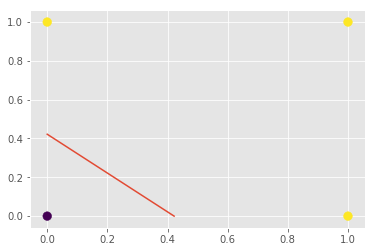

época 800
pesos:
-2.67844183531 6.31963624217 6.31963624217
coordenadas x:
[ 0.          0.42382848]
coordenadas y:
[ 0.42382848  0.        ]


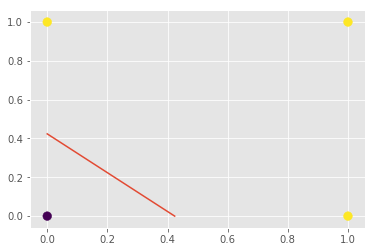

época 850
pesos:
-2.7420456355 6.44393854402 6.44393854402
coordenadas x:
[ 0.          0.42552324]
coordenadas y:
[ 0.42552324  0.        ]


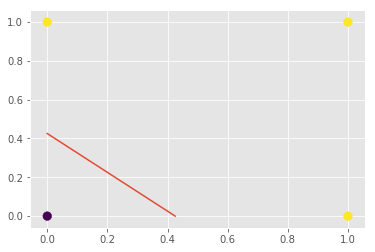

época 900
pesos:
-2.8019891023 6.56125632414 6.56125632414
coordenadas x:
[ 0.         0.4270507]
coordenadas y:
[ 0.4270507  0.       ]


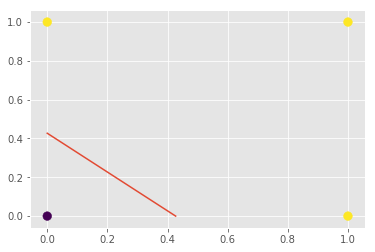

época 950
pesos:
-2.85866428307 6.67231906652 6.67231906652
coordenadas x:
[ 0.          0.42843639]
coordenadas y:
[ 0.42843639  0.        ]


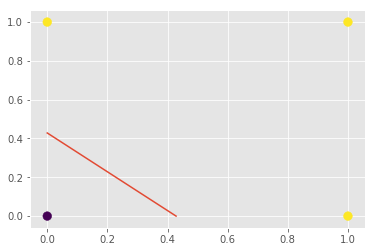

época 1000
pesos:
-2.91240396791 6.77774889129 6.77774889129
coordenadas x:
[ 0.          0.42970078]
coordenadas y:
[ 0.42970078  0.        ]


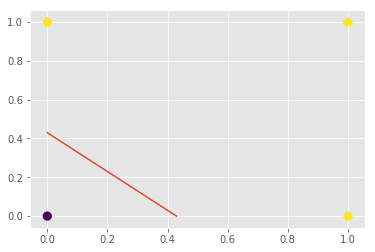

época 1050
pesos:
-2.9634929978 6.87808047528 6.87808047528
coordenadas x:
[ 0.          0.43086047]
coordenadas y:
[ 0.43086047  0.        ]


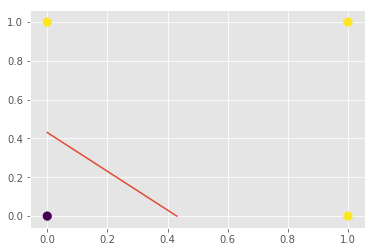

época 1100
pesos:
-3.01217700686 6.97377658425 6.97377658425
coordenadas x:
[ 0.          0.43192909]
coordenadas y:
[ 0.43192909  0.        ]


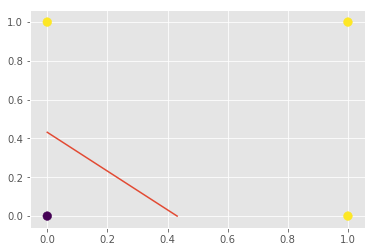

época 1150
pesos:
-3.05866926554 7.06524032259 7.06524032259
coordenadas x:
[ 0.          0.43291794]
coordenadas y:
[ 0.43291794  0.        ]


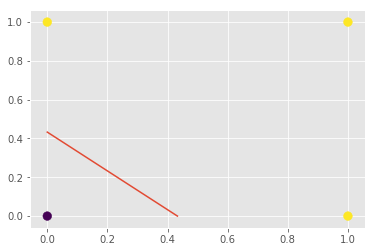

época 1200
pesos:
-3.10315609829 7.15282489542 7.15282489542
coordenadas x:
[ 0.          0.43383644]
coordenadas y:
[ 0.43383644  0.        ]


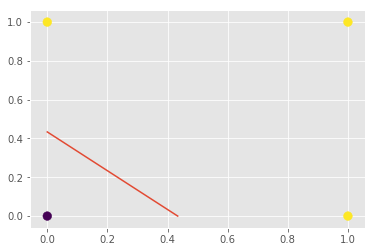

época 1206
pesos:
-3.10836773991 7.16308953571 7.16308953571
coordenadas x:
[ 0.          0.43394233]
coordenadas y:
[ 0.43394233  0.        ]


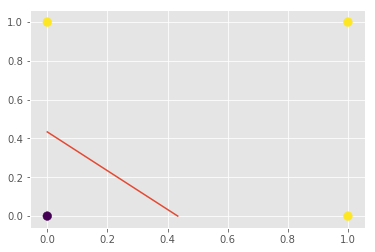

final:
1206 épocas

pesos:
-3.10836773991 7.16308953571 7.16308953571
coordenadas x:
[ 0.          0.43394233]
coordenadas y:
[ 0.43394233  0.        ]


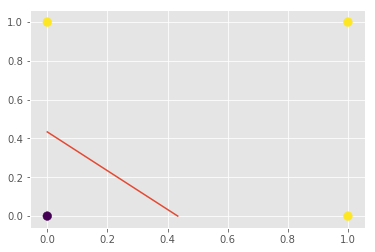

In [9]:
##Trata bias como um peso w0
pesos_w = np.zeros(3)
np_desejados = np.array([0, 1, 1, 1])
entradas = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
pesos, epocas, erros = adaline(iteracoes_maxima=3000, erros=[], taxa_aprendizagem=0.1, entradas_x=entradas, pesos_w=pesos_w, desejados_d=np_desejados, precisao = 1e-6, plot = True, debug = False)
print("final:\n%s épocas" % (str(epocas)))
print("")
plotar_fronteira(pesos, entradas, np_desejados)

In [10]:
##Testa função de ativação com pesos finais
np_entradas = np.c_[ np.ones(entradas.shape[0]), entradas ]
funcao_ativacao(np.dot(np_entradas, pesos))

array([False,  True,  True,  True], dtype=bool)